In [1]:
import numpy as np
import logging

from scrs.constants import OUT_DIR

In [2]:
IMG_SIZE = (9000, 9000)

logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

logger = logging.getLogger()

In [3]:
from scrs import Simage

SAT_LEVEL = 65535
READOUT_NOISE = 10
READOUT_OFFSET = 0
NUM_STARS = 1000
MAX_SIGMA = 25
ALLOW_SATURATION = True


# Generate an image with 1000 stars. Only save the last operation.
img = (
    Simage()
    .enable_history(OUT_DIR / "test.fits")
    .set_data(np.zeros(IMG_SIZE, dtype=np.uint16))
    .add_stars(
        num_stars=NUM_STARS, max_sigma=MAX_SIGMA, sat_level=SAT_LEVEL, allow_sat=ALLOW_SATURATION
    )
    .add_noise()
    # .add_spectra(...)
    # .add_cosmics(...)
    # .add_readout(readout_noise=READOUT_NOISE, readout_offset=READOUT_OFFSET)
)

INFO:scrs.image.image:Ran enable_history on image.
INFO:scrs.image.image:Ran set_data on image.


INFO:scrs.image.image:Saved history [54f0c1ed-8b80-4b2a-962d-5db8e2a0d06e] for set_data
INFO:scrs.image.simage:Ran add_stars on image.
INFO:scrs.image.image:Saved history [1da8d86c-1178-4b75-becb-0d11b1ac78b3] for add_stars
INFO:scrs.image.simage:Ran add_noise on image.
INFO:scrs.image.image:Saved history [2298ae8f-71cc-4f30-850d-15c9a7c7664e] for add_noise


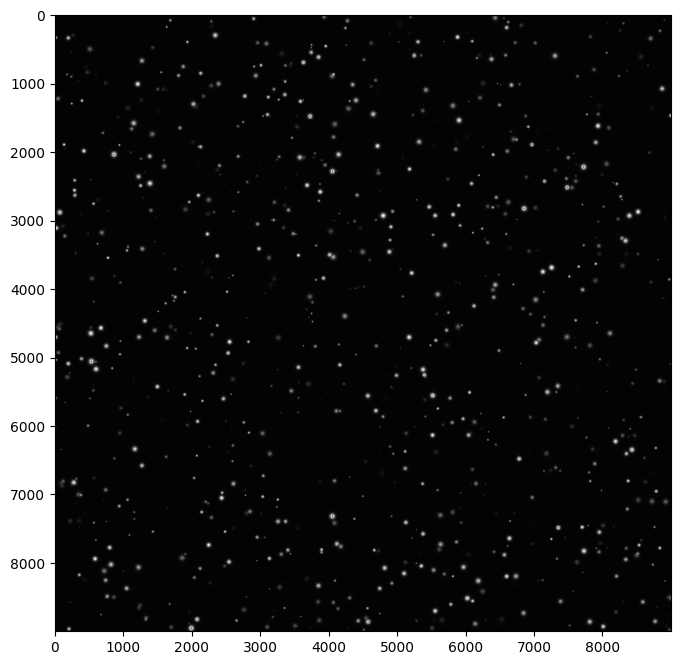

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(img.data, cmap="gray", vmin=0, vmax=SAT_LEVEL)
plt.show()